<a href="https://colab.research.google.com/github/Mariana-MarquezA/Homelessness/blob/main/Homelessness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import graphviz
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer
from patsy import dmatrices

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import missingno as msno
import scipy.stats as stats


# Load data

In [561]:
df=pd.read_csv('https://raw.githubusercontent.com/Mariana-MarquezA/Homelessness/main/homelessness_clean.csv')

# Train- split

In [562]:
X = df[df.columns.difference(['coc_number', 'rate_homeless', 'total_population', 'total_homeless',
                              'census_region','census_region_1','census_region_2', 'census_region_3',
                              'census_region_4'])]
                              
y = df['rate_homeless']

In [493]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state = 2)

# Full linear regression model

In [494]:
X_train.head()

,HUD_unit_occupancy_rate,average_Jan_temperature,average_summer_temperature,city_or_urban,gini_coefficient_2016,high_housing_density,house_price_index_2009,log_median_rent,medicare_reimbursements_per_enrollee,migration_4_year_change,net_migration,number_eviction,percent_asian,percent_black,percent_female_population,percent_latino_hispanic,percent_pacific_islander,percent_population_0_19,percent_population_65_plus,percentage_excessive_drinking,percentage_owners_cost_burden_2016,percentage_renters_severe_cost_burden_2016,poverty_rate,proportion_one_person_households,rate_unemployment,rental_vacancy_rate,share_HUD_units,share_built_before_1940,share_no_bachelors,share_overcrowded_units_2016,share_renters_2016,share_under_18_with_single_parent,share_veteran_status,suburban,total_Jan_precipitation,total_annual_precipitation,utility_costs
1943,81.41964,37.599747,74.345367,0,46.388210,0,-5.592674,1.851509,8.311735,0.046937,-3600,1216,0.009798,0.014966,0.502443,0.478744,0.000648,0.269377,0.168584,0.162451,12.183383,24.630447,20.041153,28.439405,7.139645,9.348246,2.523799,5.287351,77.612701,4.144152,29.366865,29.756767,11.478138,0,1.671501,11.609200,14.136175
687,96.00000,69.040001,83.659996,0,48.070000,1,33.752383,2.392426,12.559030,-0.263070,18420,9594,0.036589,0.279924,0.512855,0.289935,0.000618,0.235140,0.159037,0.189275,20.114765,32.149059,13.354757,29.108541,4.477407,7.310225,1.968576,0.788115,67.524094,3.819236,37.241970,30.797413,6.172667,1,2.090000,52.770000,13.200000
1223,90.00000,36.810001,75.840004,0,44.540001,1,-5.943853,2.342767,11.837500,-0.329259,599,0,0.061557,0.280193,0.525518,0.052927,0.000367,0.242814,0.164289,0.163756,14.811614,25.119120,8.777397,28.561884,4.651547,6.326679,3.317155,8.636001,60.567898,1.644365,34.173630,27.549067,8.727595,1,2.810000,42.459999,15.200000
1215,87.00000,37.869999,75.523331,0,39.660000,1,2.096973,2.672768,10.067510,-0.388065,2775,0,0.182117,0.184190,0.510790,0.066307,0.000565,0.267944,0.129809,0.162346,14.865033,22.572384,5.216963,20.592144,3.294260,4.618191,2.889869,1.570394,36.413895,1.943170,26.591852,18.937635,8.594443,1,2.710000,42.279999,17.700001
2495,93.00000,33.509998,72.746666,0,42.770000,0,10.930688,1.593309,10.319090,-0.739007,-1013,347,0.005212,0.062403,0.514962,0.015270,0.000245,0.216254,0.204376,0.201201,12.619987,19.035397,9.572590,29.862272,6.189143,6.517673,5.018569,24.872293,73.498581,1.036884,26.803106,26.717054,11.077169,1,4.700000,39.660000,16.000000


We center the variables using the median and scale with the inter-quartile range. First we need to create the scaler.

In [495]:
scaler = RobustScaler().fit(X_train)

Next, we perform the scaling transform on the predictors.

In [496]:
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns.values, index=X_train.index)

In [497]:
X_train.head()

,HUD_unit_occupancy_rate,average_Jan_temperature,average_summer_temperature,city_or_urban,gini_coefficient_2016,high_housing_density,house_price_index_2009,log_median_rent,medicare_reimbursements_per_enrollee,migration_4_year_change,net_migration,number_eviction,percent_asian,percent_black,percent_female_population,percent_latino_hispanic,percent_pacific_islander,percent_population_0_19,percent_population_65_plus,percentage_excessive_drinking,percentage_owners_cost_burden_2016,percentage_renters_severe_cost_burden_2016,poverty_rate,proportion_one_person_households,rate_unemployment,rental_vacancy_rate,share_HUD_units,share_built_before_1940,share_no_bachelors,share_overcrowded_units_2016,share_renters_2016,share_under_18_with_single_parent,share_veteran_status,suburban,total_Jan_precipitation,total_annual_precipitation,utility_costs
1943,-2.392412,0.008306,-0.143373,0.0,0.284337,0.0,-0.559927,-0.333481,-0.856250,0.032971,-0.825278,0.146109,-0.523171,-0.462255,-0.495329,3.665062,0.246364,0.768142,0.219050,-0.705833,-0.496831,-0.074072,1.237727,0.053176,1.598079,1.220775,-0.314238,-0.317077,0.537395,1.383057,-0.369052,0.606716,0.462264,0.0,-0.866919,-2.461835,-0.204014
687,0.619777,2.021127,1.013246,0.0,0.784765,1.0,1.980616,1.030520,1.816995,-0.461754,3.627705,3.613825,0.318990,1.445796,0.395109,1.940681,0.201662,-0.498561,0.000306,0.032456,1.273911,1.420222,0.015805,0.195086,-0.302977,0.437358,-0.557221,-0.623918,-0.211834,1.170783,0.329423,0.731662,-1.287619,1.0,-0.652051,1.293069,-0.441492
1223,-0.619777,-0.042254,0.042219,0.0,-0.265611,1.0,-0.582603,0.905298,1.362864,-0.567381,0.023862,-0.357202,1.103804,1.447734,1.478001,-0.223906,-0.179417,-0.214644,0.120640,-0.669920,0.089942,0.023050,-0.820696,0.079151,-0.178627,0.059282,0.032959,-0.088704,-0.728435,-0.250107,0.057279,0.341648,-0.444937,1.0,-0.282384,0.352537,0.065846
1215,-1.239553,0.025608,0.002897,0.0,-1.717690,1.0,-0.063400,1.737445,0.248834,-0.661228,0.463903,-0.357202,4.893473,0.756385,0.218482,-0.101707,0.120700,0.715096,-0.669417,-0.708720,0.101868,-0.483104,-1.471357,-1.611065,-1.147842,-0.597463,-0.154034,-0.570568,-2.522229,-0.054891,-0.615179,-0.692289,-0.488854,1.0,-0.333727,0.336116,0.700018
2495,0.000000,-0.253521,-0.341888,0.0,-0.792288,0.0,0.507000,-0.984571,0.407178,-1.221279,-0.302123,-0.213576,-0.667320,-0.120645,0.575280,-0.567823,-0.363695,-1.197302,1.039178,0.360686,-0.399356,-1.186066,-0.675377,0.354937,0.919342,0.132700,0.777550,1.018586,0.231861,-0.646987,-0.596442,0.241751,0.330014,1.0,0.687991,0.097106,0.268781


 We fit the model

In [498]:
model = sm.OLS(y_train,sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          rate_homeless   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     11.00
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           2.59e-36
Time:                        06:39:36   Log-Likelihood:                -1189.1
No. Observations:                 317   AIC:                             2454.
Df Residuals:                     279   BIC:                             2597.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

We create a table that displays the coeffients, the p-value and absolute coeffients to compare the signifance of the variable and their impact in the target variable with is rate of homeless.

In [499]:
variables = X_train.columns
variables = np.insert(variables, 0, 'intercept')

results = pd.DataFrame(index = variables, 
             data = {'p-value':model.pvalues.values.round(3), 
                     'significant':model.pvalues.values < 0.05,
                     'coefficient':model.params.values.round(2),
                     'abs_coefficient':np.abs(model.params.values.round(2))})

results[results['significant'] == True].sort_values(by='abs_coefficient', ascending=False)

,p-value,significant,coefficient,abs_coefficient
intercept,0.000,True,16.73,16.73
log_median_rent,0.000,True,12.37,12.37
proportion_one_person_households,0.000,True,7.37,7.37
percent_black,0.009,True,-5.28,5.28
suburban,0.036,True,-4.85,4.85
share_HUD_units,0.007,True,4.32,4.32
migration_4_year_change,0.000,True,2.97,2.97
share_overcrowded_units_2016,0.044,True,2.85,2.85
rate_unemployment,0.014,True,1.94,1.94
total_Jan_precipitation,0.000,True,1.69,1.69


The table above shows all the variables that are significant up to a 0.05 level. They are ordered by the magnitud of their coefficient. The 3 predictors with the greatest magnitudes are percent_pacific_islander, percent_black, and log_median_rent.

In [500]:
X_train.shape

(317, 37)

By looking at the shape of the data we are using, we can notice there are too many variables in the model. We are likely overfitting because while we have 37 variables, we only have 317 observations.

We will use regularization methods and dimensionality reduction methods to build a model.

We use the model to predict the test data. Compute the MSE, RMSE, and $R^2$.

In [501]:
y_pred_lr = model.predict(sm.add_constant(X_test))

In [502]:
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, y_pred_lr)

print('MSE =', MSE.round(3), ' RMSE =', RMSE.round(3), ' R-squared =', R_squared.round(3))

MSE = 122187286.154  RMSE = 11053.836  R-squared = -977478.221


In [503]:
mean_absolute_error(y_test, y_pred_lr)

4972.711356448318

Plot the values of `y` vs. the predicted values

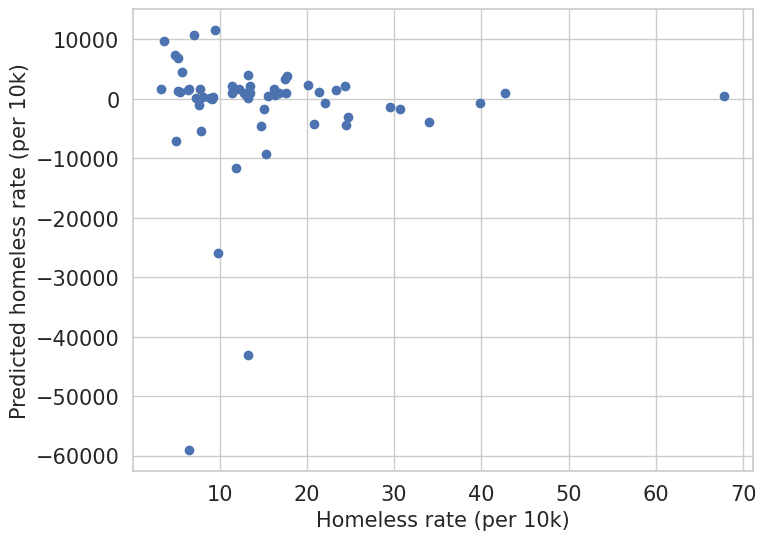

In [504]:
plt.figure(figsize = (8,6))

plt.plot(y_test, y_pred_lr, 'o');

plt.xlabel('Homeless rate (per 10k)', fontsize = 15)
plt.ylabel('Predicted homeless rate (per 10k)', fontsize = 15)

plt.tick_params(labelsize = 15)

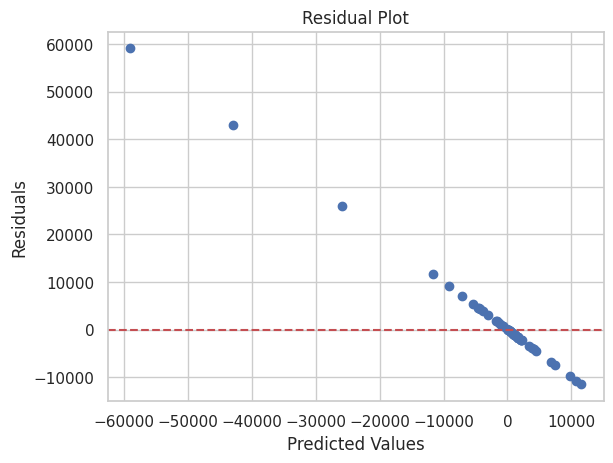

In [505]:
residuals = y_test - y_pred_lr

plt.scatter(y_pred_lr, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

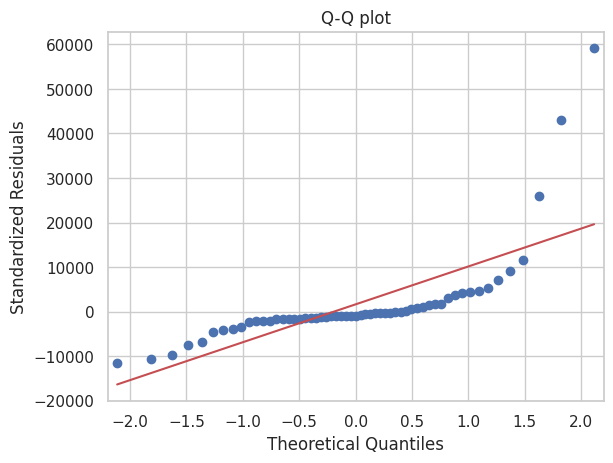

In [506]:
fig, ax = plt.subplots()  # Create a new figure and axes

sm.qqplot(residuals, line='r', ax=ax)  # Pass the axes to qqplot()
ax.set_title("Q-Q plot")
ax.set_ylabel("Standardized Residuals")
plt.show()

Some issues we need to solve/consider:

1) We have too many predictors for the data set size

2) There are outliers. Areas with ohigh homeless rates might be unique

3) The model might need to be nonlinear

In [507]:
scaler = RobustScaler().fit(X_train)

In [508]:
# Transform X_train and X_test using the scaler object
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Lasso

Lasso does not need an input of alpha but we want to check that what it calculates is in an appropiate range, Thus, we will generate alphas and create a graph for visual verification.

In [509]:
alphas = 10**np.linspace(-3,2,50)

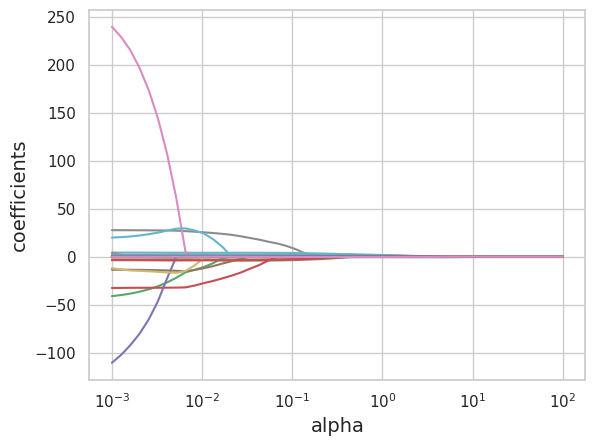

In [510]:
lasso = Lasso(max_iter = 100000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X,y)
    coefs.append(lasso.coef_)


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);


We do 5-fold cross validation to find $\alpha$

In [511]:
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)

In [512]:
lassocv.fit(X, y)
lassocv.alpha_

6.233747166816475

We know that the $\alpha$ was calculate correctly because 6.23 is in the $10^1$ order. In the graph we can see that at that point the coeffients have converged and are being minimized.

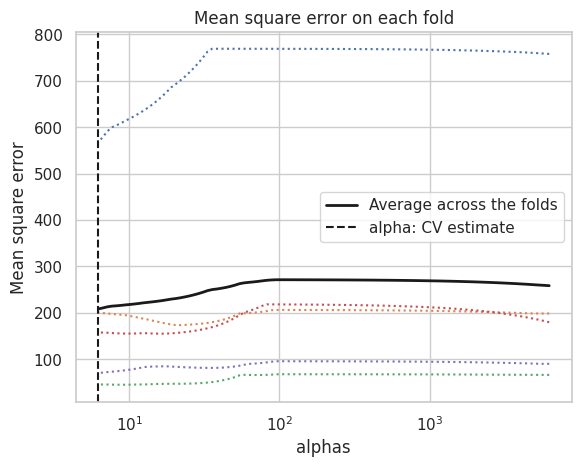

In [513]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, ":")
plt.plot(
    lassocv.alphas_ ,
    lassocv.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lassocv.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight");

The graph above let us see the variation across the folds. It is noticeable that there are big differences between the folds. The graph also allow us to see how the alpha indirectly minimizes the Mean Square Error by penalizing the coeffients.

We fit the Lasso model on the training data with the best $\alpha$ and examine the coefficients.

In [514]:
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)

In [515]:
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X_train.columns
variables = np.insert(variables, 0, 'intercept')

summary_lasso = pd.DataFrame(data = coefficients.round(2), index = variables, columns = ['Estimated Coefficient'])

In [516]:
display(summary_lasso)

,Estimated Coefficient
intercept,14.78
HUD_unit_occupancy_rate,-0.00
average_Jan_temperature,0.00
average_summer_temperature,-0.00
city_or_urban,0.00
gini_coefficient_2016,0.00
high_housing_density,0.00
house_price_index_2009,0.00
log_median_rent,0.00
medicare_reimbursements_per_enrollee,0.00


In [517]:
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))

print('MSE =', MSE_lasso.round(3), ' RMSE =', RMSE_lasso.round(3), ' R-squared =', R_squared_lasso.round(3))

MSE = 140.16  RMSE = 11.839  R-squared = -0.121


# Ridge regression

Ridge regression finds the parameters in the linear model by minimizing a penalized squared error:

$$C(\boldsymbol{\beta}) = \sum_{i=1}^n(y_i - \beta_{0} - \sum_{j=1}^p\beta_{j}x_{ij})^2 + \alpha \sum_{j=1}^p\beta_{j}^2 = \text{RSS} + \alpha \sum_{j=1}^p\beta_{j}^2$$

There is a hyperparameter $\alpha$ that influences the performance. We will use cross validation to determine the best value.

In [518]:
alphas = 10**np.linspace(-1,5,20)

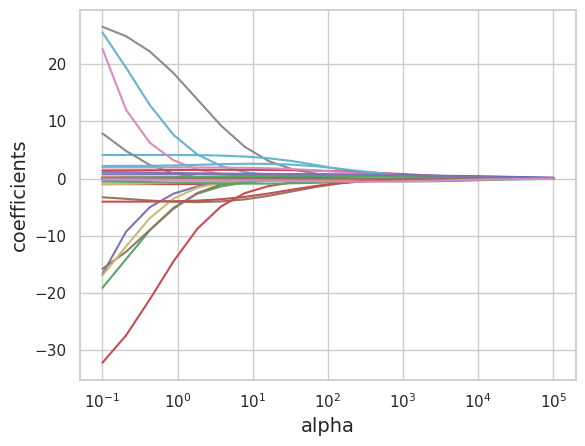

In [519]:
ridge = Ridge(max_iter = 100000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

We use cross-validation to find the best alpha for Ridge regression. We will use a 5-fold validation.

In [520]:
ridgecv = RidgeCV(alphas = alphas, cv = 5, scoring = 'neg_mean_squared_error')

ridgecv.fit(X_train, y_train);

Print the best $\alpha$

In [521]:
ridgecv.alpha_

143.8449888287663

We can verify this value by looking at the table. The coeffients appear to converge after $10^2$

We then fit the ridge regression model on the training data with the best $\alpha$ and examine the coefficients.

In [522]:
ridge_reg = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [523]:
coefficients = ridge_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, ridge_reg.intercept_.round(3))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

summary_ridge = pd.DataFrame(data = coefficients, index = variables, columns = ['Estimated Coefficient'])

In [524]:
display(summary_ridge)

,Estimated Coefficient
intercept,12.312
HUD_unit_occupancy_rate,-0.380
average_Jan_temperature,0.243
average_summer_temperature,-0.782
city_or_urban,0.470
gini_coefficient_2016,0.715
high_housing_density,-0.538
house_price_index_2009,1.370
log_median_rent,1.810
medicare_reimbursements_per_enrollee,0.113


In [525]:
MSE_ridge = mean_squared_error(y_test, ridge_reg.predict(X_test))
RMSE_ridge = np.sqrt(MSE_ridge)
R_squared_ridge = r2_score(y_test, ridge_reg.predict(X_test))
print('MSE =', MSE_ridge.round(3), ' RMSE =', RMSE_ridge.round(3), ' R-squared =', R_squared_ridge.round(3))

MSE = 15616097.519  RMSE = 3951.721  R-squared = -124925.343


It may not be performing well because of irrelevant features or strong correlation.

# XGBoost

In [526]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True, scoring = 'neg_mean_squared_error')

search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7febe9b8af50>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7febe9b89ff0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7febe9312e60>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7febe9312cb0>},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [527]:
search.best_params_

{'colsample_bytree': 0.9762883326360958,
 'gamma': 0.1763836847588986,
 'learning_rate': 0.31589038937559044,
 'max_depth': 2,
 'n_estimators': 111,
 'subsample': 0.6277961351207143}

In [528]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror")

In [529]:
model_xgb.set_params(**search.best_params_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9762883326360958, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1763836847588986, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.31589038937559044, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=111, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Fit the model on the training data

In [530]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9762883326360958, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1763836847588986, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.31589038937559044, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=111, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Predict the test data

In [531]:
y_pred_xgb = model_xgb.predict(X_test)

Plot the test values of `y` vs. the predicted values

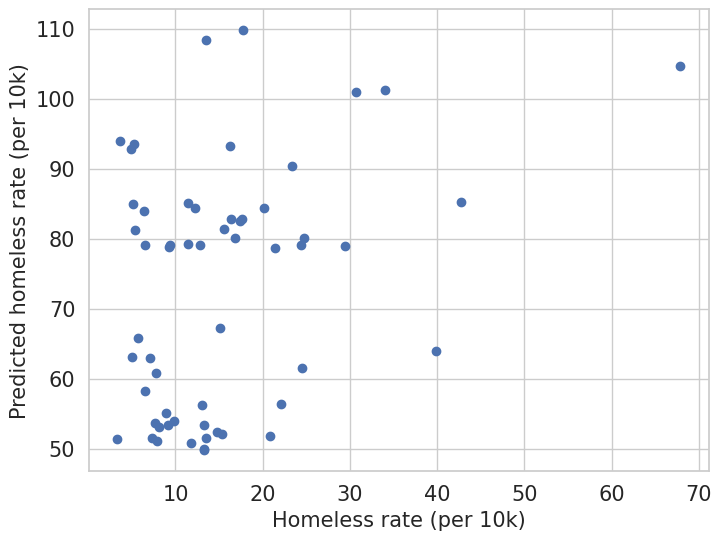

In [532]:
plt.figure(figsize = (8,6))

plt.plot(y_test, y_pred_xgb, 'o');

plt.xlabel('Homeless rate (per 10k)', fontsize = 15)
plt.ylabel('Predicted homeless rate (per 10k)', fontsize = 15)

plt.tick_params(labelsize = 15)

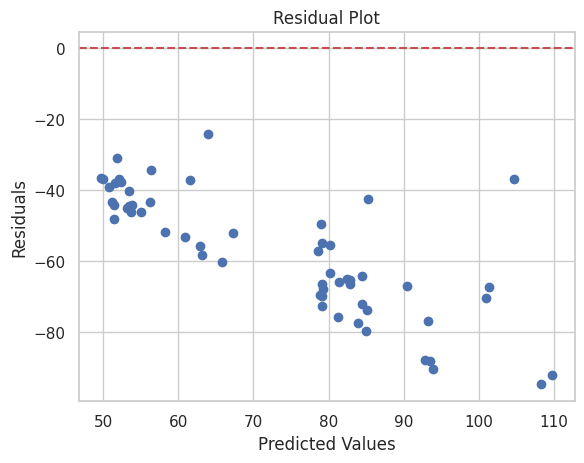

In [533]:
residuals = y_test - y_pred_xgb

plt.scatter(y_pred_xgb, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

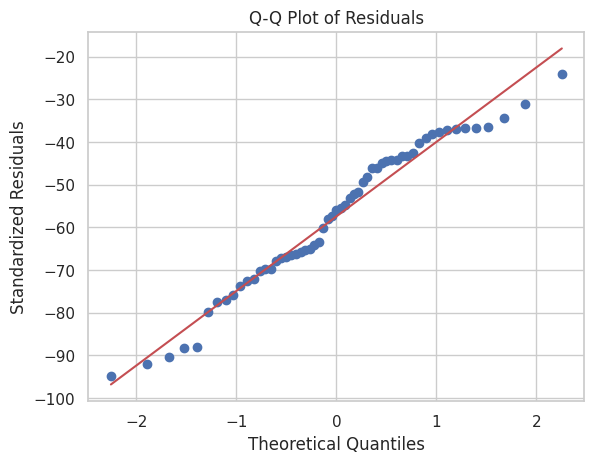

In [534]:
# Generate the Q-Q plot
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

Compute the RMSE

In [535]:
MSE_ridge = mean_squared_error(y_test, y_pred_xgb, squared = False)
RMSE_ridge = np.sqrt(MSE_ridge)
R_squared_ridge = r2_score(y_test, ridge_reg.predict(X_test))
print('MSE =', MSE_ridge.round(3), ' RMSE =', RMSE_ridge.round(3), ' R-squared =', R_squared_ridge.round(3))

MSE = 59.941  RMSE = 7.742  R-squared = -124925.343


Compute the mean absolute error

In [536]:
mean_absolute_error(y_test, y_pred_xgb).round(3)

57.432

Plot the variable importances for the XGBoost model.

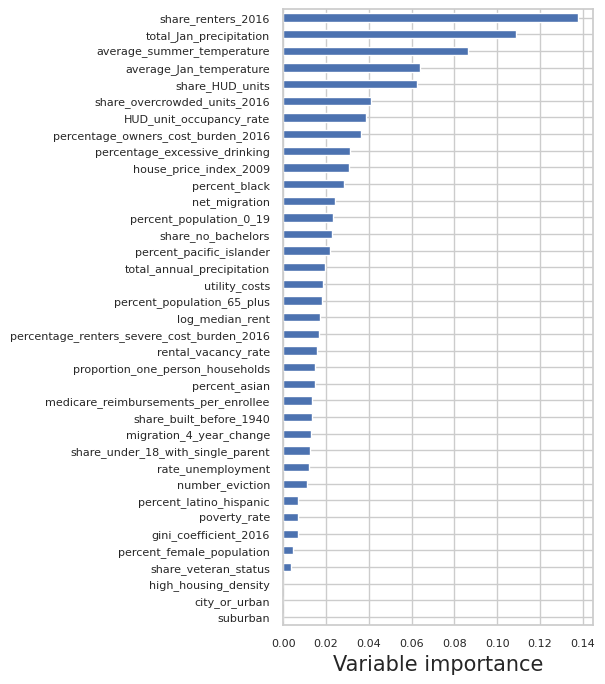

In [537]:
(pd.DataFrame(dict(cols=X.columns, imp=model_xgb.feature_importances_)).
 sort_values(by = 'imp').
 plot('cols', 'imp', 'barh', legend = False, figsize = (4,8)))

plt.ylabel('')
plt.xlabel('Variable importance', fontsize = 15)

plt.tick_params(labelsize = 8);

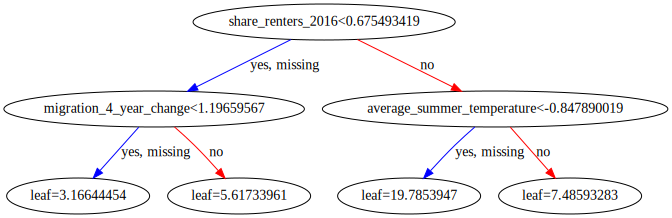

In [538]:
xgb.to_graphviz(model_xgb, num_trees=0) # Try different values of num_trees to plot other trees

# Comments on correlation and multicollinearity

In [539]:
# Assuming you have a DataFrame named 'data' containing your independent variables
# X_train is the subset of independent variables for which you want to calculate VIF

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X.shape[1])]

# Sort the VIF values in ascending order
vif_sorted = vif.sort_values(by='VIF')

# Display the sorted VIF values
print(vif_sorted)

                                      Variable        VIF
0                      HUD_unit_occupancy_rate   1.324937
11                             number_eviction   1.715203
34                     total_Jan_precipitation   1.874175
9                      migration_4_year_change   1.900693
25                         rental_vacancy_rate   2.029092
24                           rate_unemployment   2.129461
10                               net_migration   2.131048
35                  total_annual_precipitation   2.341161
19               percentage_excessive_drinking   2.505174
36                               utility_costs   2.617417
16                    percent_pacific_islander   2.781074
6                       house_price_index_2009   2.837388
3                                city_or_urban   2.891581
33                                    suburban   2.954387
8         medicare_reimbursements_per_enrollee   3.209879
14                   percent_female_population   3.210400
21  percentage

In [540]:
def calculate_correlation_pairs(df, threshold):
    """
    Calculate the correlation coefficients of unique pairs of variables in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - threshold (float): The correlation threshold beyond which pairs are considered significant.

    Returns:
    - correlation_df (pd.DataFrame): DataFrame containing the unique pairs of variables, their correlation
                                     coefficients (rounded to 3 decimal places), and separate columns for each variable.
                                     The DataFrame is sorted by the absolute value of the correlation coefficient
                                     in descending order.
    """
    correlation_matrix = df.corr() # Compute the correlation matrix
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    # Select the upper triangle of the correlation matrix

    correlated_pairs = [(column1, column2, correlation)
                        for column1 in upper_triangle.columns
                        for column2, correlation in upper_triangle[column1].items()
                        if not pd.isna(correlation) and abs(correlation) >= threshold]

    correlated_pairs.sort(key=lambda x: abs(x[2]), reverse=True)  # Sort by absolute correlation coefficient

    # Create the DataFrame for correlated pairs
    correlation_df = pd.DataFrame(correlated_pairs, columns=['Variable 1', 'Variable 2', 'Correlation Coefficient'])

    # Round the correlation coefficients to 3 decimal places
    correlation_df['Correlation Coefficient'] = correlation_df['Correlation Coefficient'].round(3)

    # Sort the DataFrame by the absolute value of the correlation coefficient
    correlation_df['Absolute Correlation Coefficient'] = correlation_df['Correlation Coefficient'].abs()
    correlation_df.sort_values(by='Absolute Correlation Coefficient', ascending=False, inplace=True)

    # Reset the index of the DataFrame
    correlation_df.reset_index(drop=True, inplace=True)

    # Drop the 'Absolute Correlation Coefficient' column
    correlation_df.drop('Absolute Correlation Coefficient', axis=1, inplace=True)

    return correlation_df


In [541]:
dummy_variables = ['census_region_2', 'census_region_3', 'census_region_4', 'city_or_urban','high_housing_density', 'suburban']

correlation_df = calculate_correlation_pairs(df_train[df_train.columns.difference(dummy_variables)],0.5)

display(correlation_df)

,Variable 1,Variable 2,Correlation Coefficient
0,share_under_18_with_single_parent,percent_black,0.791
1,average_summer_temperature,average_Jan_temperature,0.778
2,share_overcrowded_units_2016,percent_latino_hispanic,0.772
3,percentage_owners_cost_burden_2016,log_median_rent,0.734
4,share_under_18_with_single_parent,poverty_rate,0.704
5,percent_population_65_plus,percent_population_0_19,-0.676
6,share_no_bachelors,log_median_rent,-0.667
7,percent_asian,log_median_rent,0.635
8,share_renters_2016,gini_coefficient_2016,0.588
9,share_built_before_1940,share_HUD_units,0.587


# Pairplots

In [542]:
df_interest = df[df_train.columns]

In [ ]:
'''
corr_columns = (np.abs(df_interest.corr()['rate_homeless']).
                sort_values(ascending=False).
                iloc[11:21].
                index.
                values)

corr_columns = np.append(['rate_homeless'], corr_columns)
corr_columns = np.append(corr_columns, 'census_region')

sns.pairplot(df_interest[corr_columns], hue='census_region');
'''

In [ ]:
'''
corr_columns = (np.abs(df_interest.corr()['rate_homeless']).
                sort_values(ascending=False).
                iloc[21:31].
                index.
                values)
corr_columns = np.append(['rate_homeless'], corr_columns)
corr_columns = np.append(corr_columns, 'census_region')

sns.pairplot(df_interest[corr_columns], hue='census_region');
'''

In [ ]:
'''
corr_columns = (np.abs(df_interest.corr()['rate_homeless']).
                sort_values(ascending=False).
                iloc[31:].
                index.
                values)

corr_columns = np.append(['rate_homeless'], corr_columns)
corr_columns = np.append(corr_columns, 'census_region')

sns.pairplot(df_interest[corr_columns], hue='census_region');
'''

# Log-Linear Regression Model with Census Region dummies

In [544]:
X = df[df.columns.difference(['coc_number', 'rate_homeless', 'total_population', 'total_homeless','census_region_1','census_region'])]
                              
y = df['rate_homeless']

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state = 2)

In [546]:
df_train = pd.concat([X_train, y_train], axis=1)

# Create the formula string
formula = f"np.log1p(df_train['rate_homeless']) ~ {' + '.join(X_train.columns)} + I(census_region_2 + census_region_3 + census_region_4) * (log_median_rent + utility_costs)"

model = smf.ols(formula=formula, data=df_train)
results = model.fit()

print(results.summary())

                                     OLS Regression Results                                    
Dep. Variable:     np.log1p(df_train['rate_homeless'])   R-squared:                       0.648
Model:                                             OLS   Adj. R-squared:                  0.594
Method:                                  Least Squares   F-statistic:                     12.01
Date:                                 Wed, 07 Jun 2023   Prob (F-statistic):           1.36e-41
Time:                                         06:44:53   Log-Likelihood:                -159.87
No. Observations:                                  317   AIC:                             405.7
Df Residuals:                                      274   BIC:                             567.4
Df Model:                                           42                                         
Covariance Type:                             nonrobust                                         
                                        

In [547]:
# Concatenate X_test and y_test into a single DataFrame
df_test = pd.concat([X_test, y_test], axis=1)

# Generate predictions on the test set
y_pred = results.predict(df_test)

In [548]:
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('MSE =', MSE.round(3), ' RMSE =', RMSE.round(3), ' R-squared =', R_squared.round(3))

MSE = 122187286.154  RMSE = 11053.836  R-squared = -977478.221


In [549]:
mean_absolute_error(y_test, y_pred)

12.852056111220021

# Cross-Validation

In [550]:
X = df[df.columns.difference(['coc_number', 'rate_homeless', 'total_population', 'total_homeless',
                              'census_region','census_region_1'])]
                              
y = df['rate_homeless']

In [551]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state = 2)

We can use cross-validation to find the best tree depth for a tree model. The objective is to find the tree depth that minimizes the mean squared error, MSE. This method creates different folds and calculates the best depth. We need to keep in mind that the answer is likely to change according to the fold or the sample of the data.

In [552]:
model = tree.DecisionTreeRegressor()

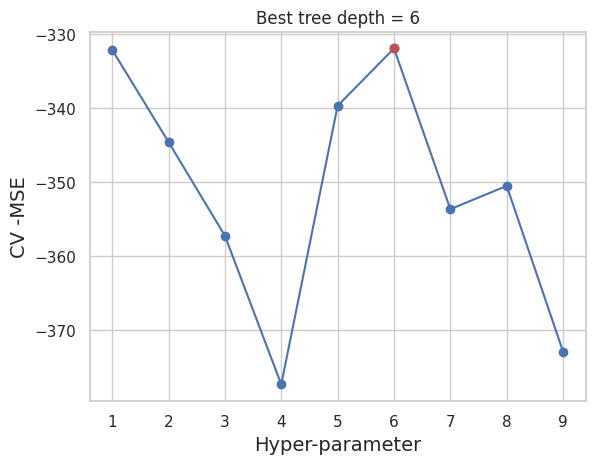

In [553]:
# Values of tree depth to test
parms = np.arange(1,10)
# Define the set of parameters to tune (just tree depth)
tuned_parameters = [{"max_depth": parms}]
# Specify the number of folds
n_folds = 5

# Do the cross validation
modelCV = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error').fit(X_train, y_train)

# Get the scores
scores = modelCV.cv_results_["mean_test_score"]

# Get the best value of alpha
best_tree = modelCV.best_params_['max_depth']

# Plot
plt.plot(parms, scores,'o-')
plt.plot(best_tree, scores[parms == best_tree],'ro')

plt.xlabel('Hyper-parameter', fontsize = 14)
plt.ylabel('CV -MSE', fontsize = 14)
plt.title('Best tree depth = ' + str(best_tree));

## LOOCV

In leave one out cross validation, we don't use a single train/test split. Instead, we go through the entire data set, taking turns leaving out single measurements as the "test set". The advantage is that by the end of the process all the data has been used to train the data. THe shortcoming is that it can take a long time if the data set is large.

In [554]:
from sklearn.model_selection import LeaveOneOut

In [555]:
# Values of tree depth to test
parms = np.arange(1,10)
# Define the set of parameters to tune (just tree depth)
tuned_parameters = [{"max_depth": parms}]
# Specify the number of folds
n_folds = 5

In [556]:
# Initialize a list to record the RMSE
tree_rmse = []

# Create the model object
model = tree.DecisionTreeRegressor()

# Create the leave one out object
loo = LeaveOneOut()

# Loop over all splits
for train_index, test_index in loo.split(X):

    X_train = X.iloc[train_index,:]
    y_train = y.iloc[train_index]

    X_test = X.iloc[test_index,:]
    y_test = y.iloc[test_index]

    # Do the cross validation
    modelCV = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error').fit(X_train, y_train)

    # Get the scores
    scores = modelCV.cv_results_["mean_test_score"]

    # Get the best value of alpha
    best_tree = modelCV.best_params_['max_depth']

    # Fit the model
    tree_model = tree.DecisionTreeRegressor(max_depth=best_tree)

    tree_model.fit(X_train, y_train)

    # Predict the left out value
    y_prediction = tree_model.predict(X_test)

    # Record the RMSE
    tree_rmse.append(mean_squared_error(y_test, y_prediction, squared=False))

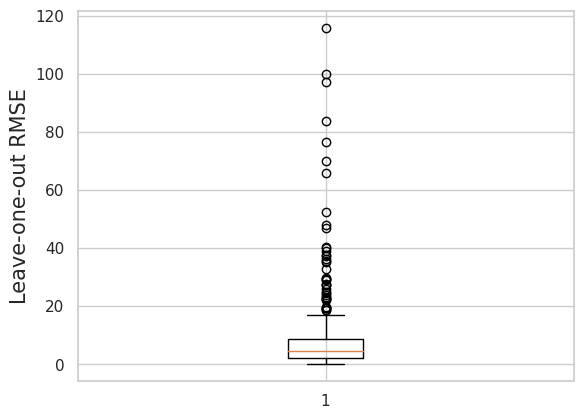

In [557]:
plt.boxplot(tree_rmse);
plt.ylabel('Leave-one-out RMSE', fontsize=15);